In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import time

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [2]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\1397457445.py:2: DtypeWarning: Columns (0,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)


In [3]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [4]:
df['z-axis'] = df['z-axis'].str.replace(';', '')

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\430328684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z-axis'] = df['z-axis'].str.replace(';', '')


In [5]:
df['z-axis'] = df['z-axis'].astype(float)

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\3063709668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z-axis'] = df['z-axis'].astype(float)


In [6]:
df.describe()

,timestamp,x-axis,z-axis
count,1.408249e+06,1.408249e+06,1.277178e+06
mean,2.843950e+13,7.571511e-01,4.186533e-01
std,4.501486e+13,6.820260e+00,4.682360e+00
min,0.000000e+00,-1.961000e+01,-1.980000e+01
25%,2.013222e+12,-2.750000e+00,-2.180000e+00
50%,9.356132e+12,2.700000e-01,0.000000e+00
75%,2.434760e+13,4.370000e+00,2.683209e+00
max,2.093974e+14,1.995000e+01,1.961000e+01


In [7]:
df['y-axis'] = df['y-axis'].astype(float)

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\2893950108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y-axis'] = df['y-axis'].astype(float)


In [8]:
df.describe()

,timestamp,x-axis,y-axis,z-axis
count,1.408249e+06,1.408249e+06,1.408249e+06,1.277178e+06
mean,2.843950e+13,7.571511e-01,7.417776e+00,4.186533e-01
std,4.501486e+13,6.820260e+00,6.746395e+00,4.682360e+00
min,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,2.013222e+12,-2.750000e+00,3.300000e+00,-2.180000e+00
50%,9.356132e+12,2.700000e-01,8.080000e+00,0.000000e+00
75%,2.434760e+13,4.370000e+00,1.180000e+01,2.683209e+00
max,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [9]:
df['user'] = df['user'].astype(int)

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\965917965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user'].astype(int)


In [10]:
df = df.dropna()

In [11]:
df.shape

(1277178, 6)

In [12]:
df = df[df['timestamp'] != 0]

In [13]:
df.shape

(1257830, 6)

In [14]:
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

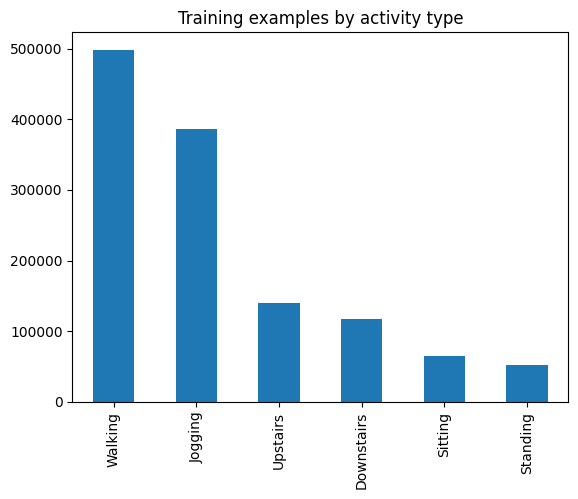

In [15]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');


<AxesSubplot: title={'center': 'Training examples by user'}>

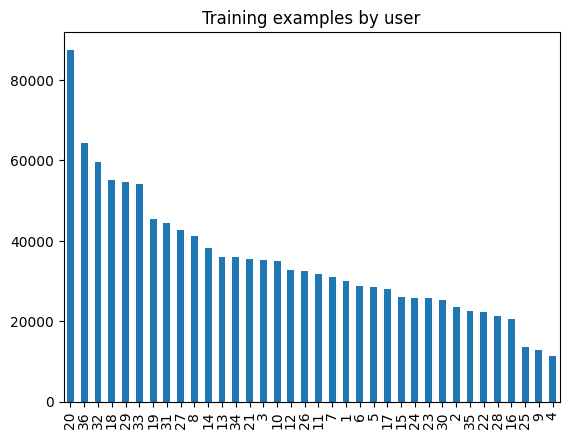

In [16]:
df['user'].value_counts().plot(kind='bar', title='Training examples by user')

In [17]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

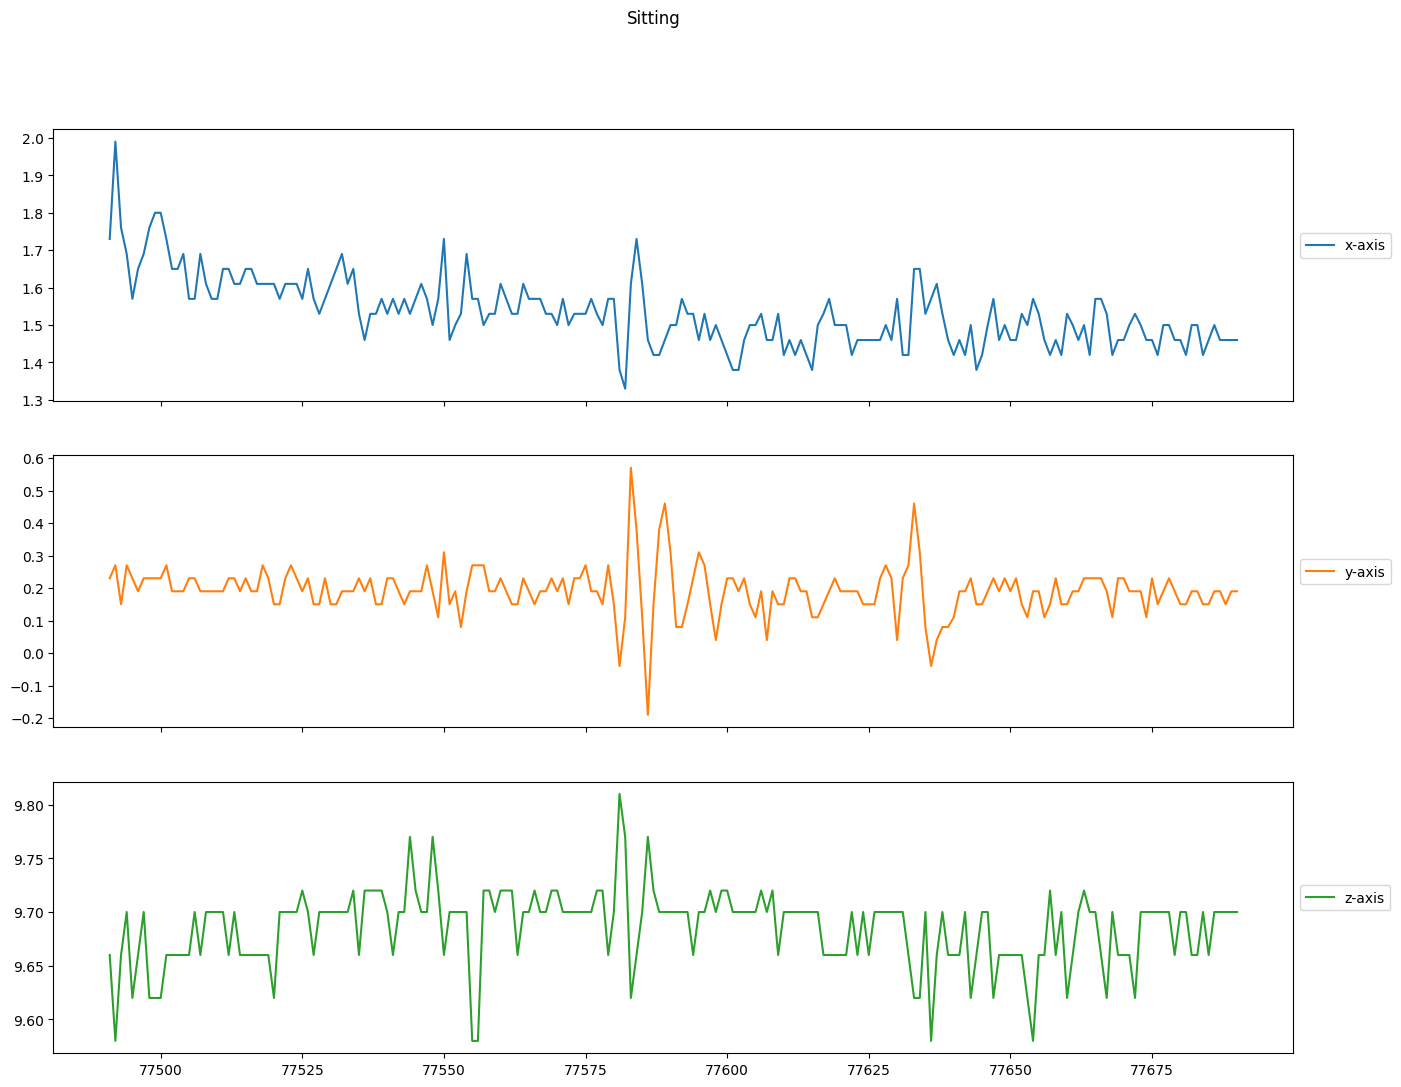

In [18]:
plot_activity("Sitting", df)

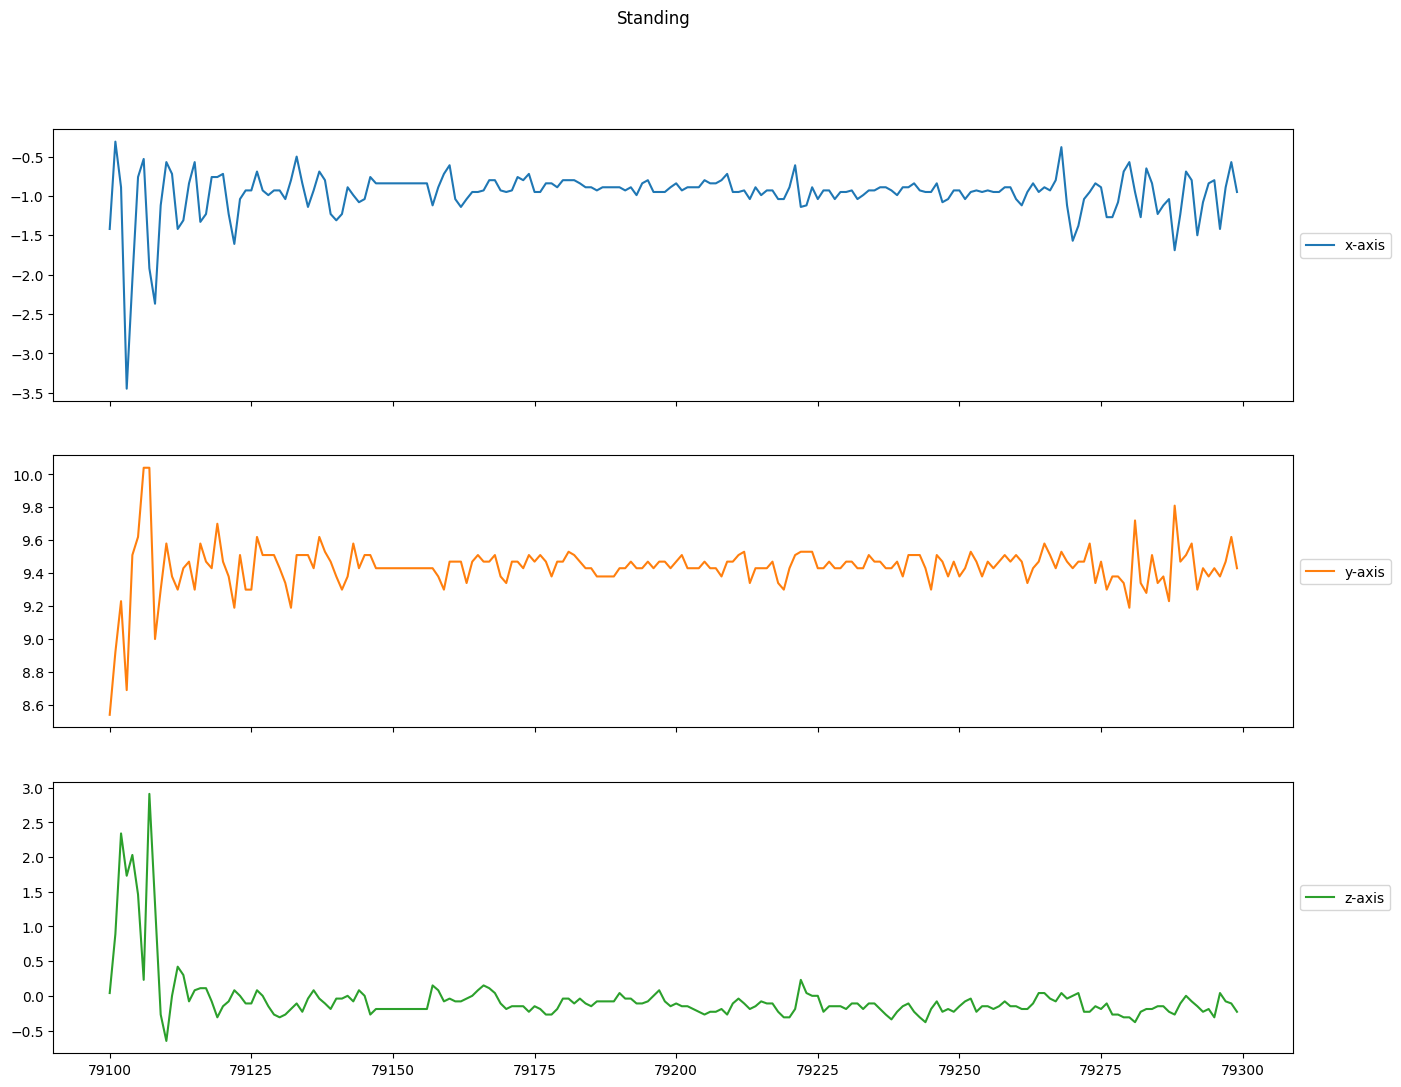

In [19]:
plot_activity("Standing", df)

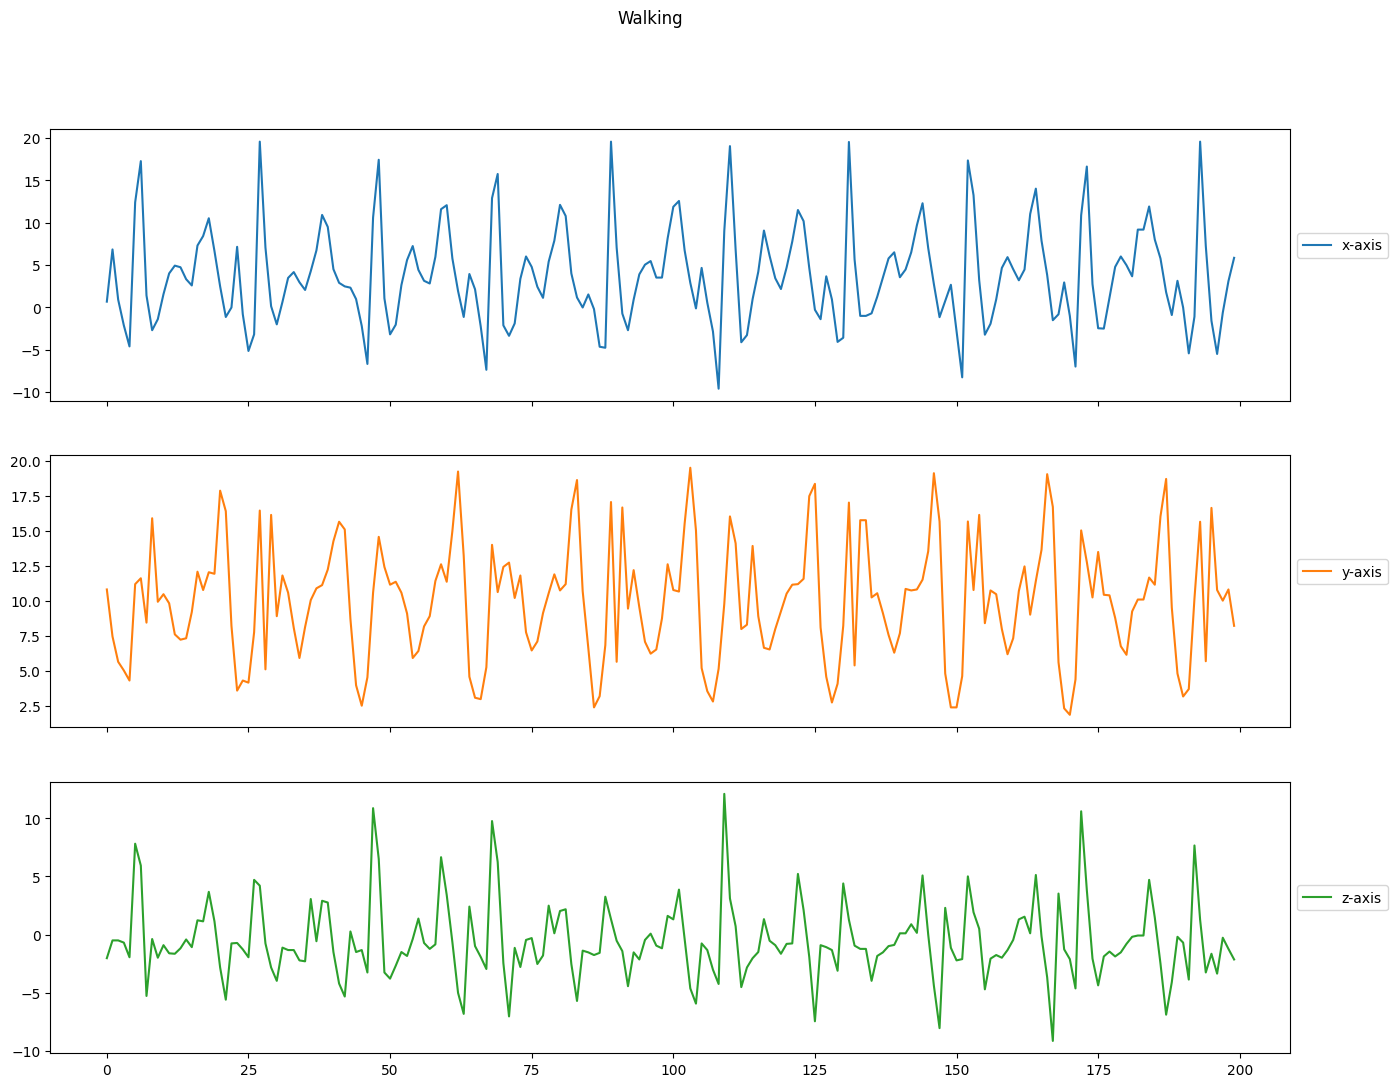

In [20]:
plot_activity("Walking", df)

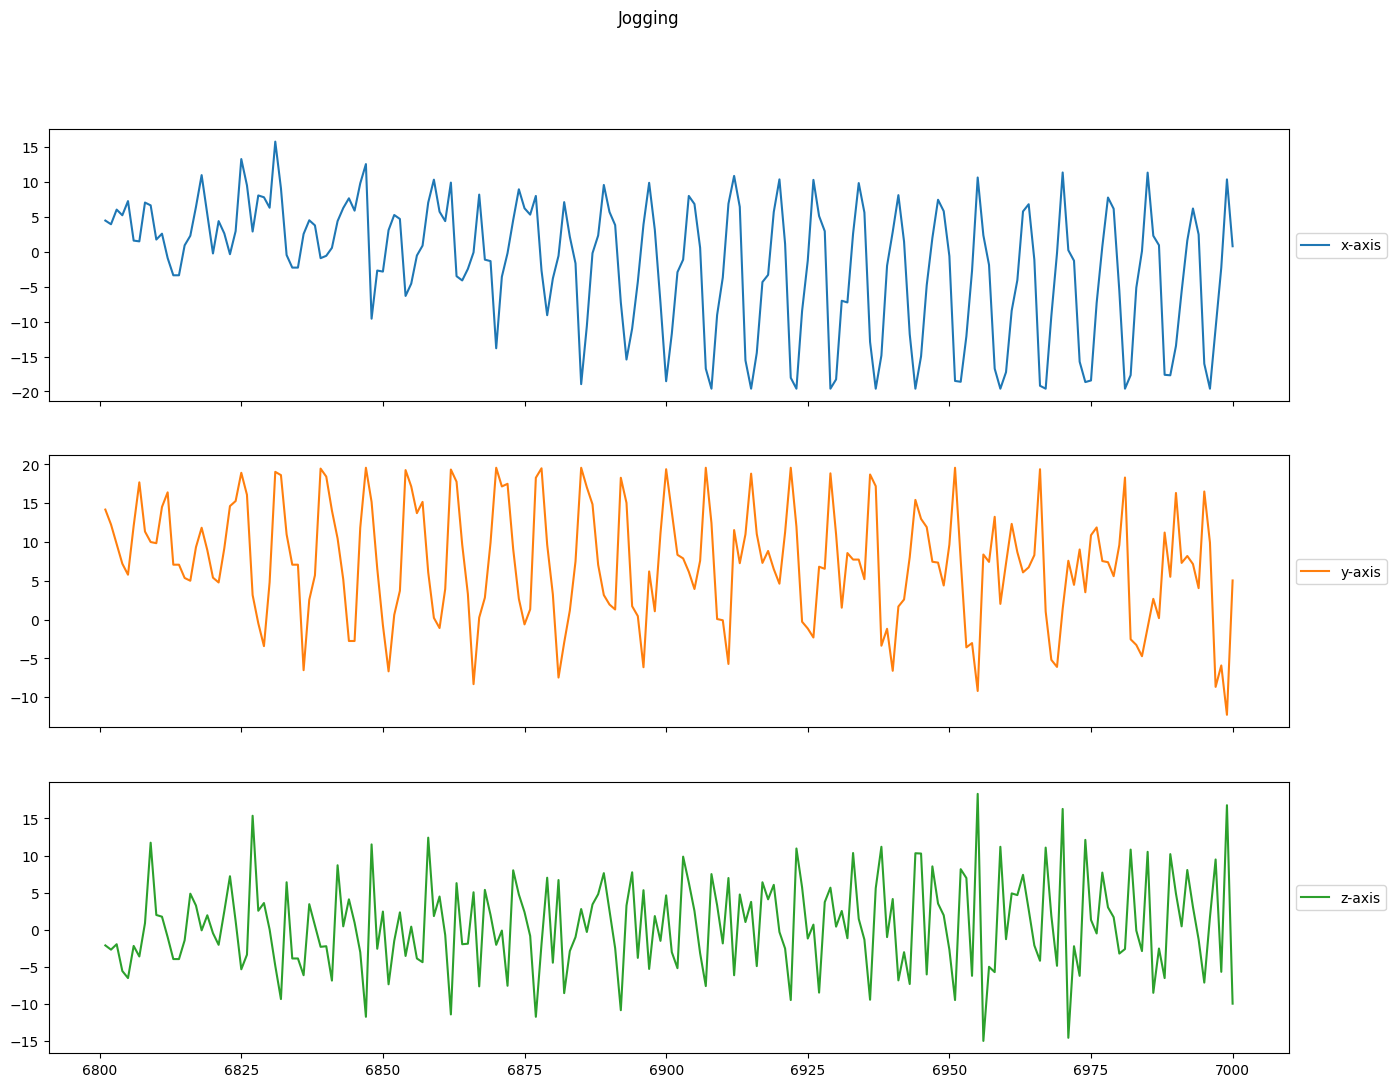

In [21]:
plot_activity("Jogging", df)

In [22]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1257825,36,Standing,15049112287000,-1.50,9.53,2.533385
1257826,36,Standing,15049162275000,-2.07,8.77,2.179256
1257827,36,Standing,15049162275000,-2.07,8.77,2.179256
1257828,36,Standing,15049212262000,-2.14,9.89,3.255263


In [23]:
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [24]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1257825,36,Standing,15049112287000,-1.50,9.53,2.533385
1257826,36,Standing,15049162275000,-2.07,8.77,2.179256
1257827,36,Standing,15049162275000,-2.07,8.77,2.179256
1257828,36,Standing,15049212262000,-2.14,9.89,3.255263


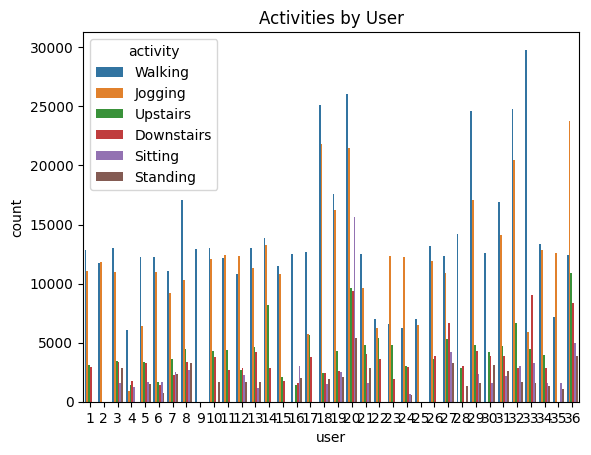

In [25]:
sns.countplot(x = 'user', hue= 'activity', data = df)
plt.title('Activities by User')
plt.show()

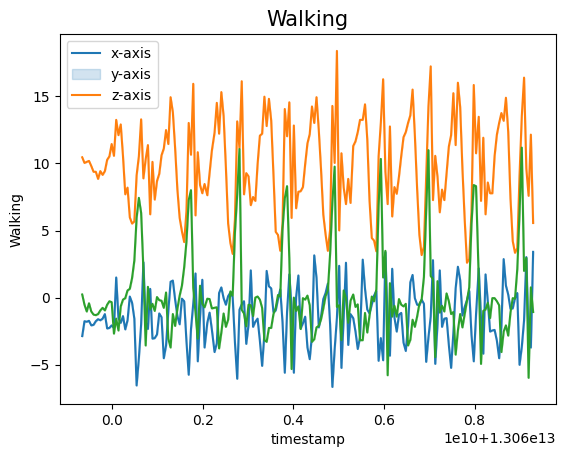

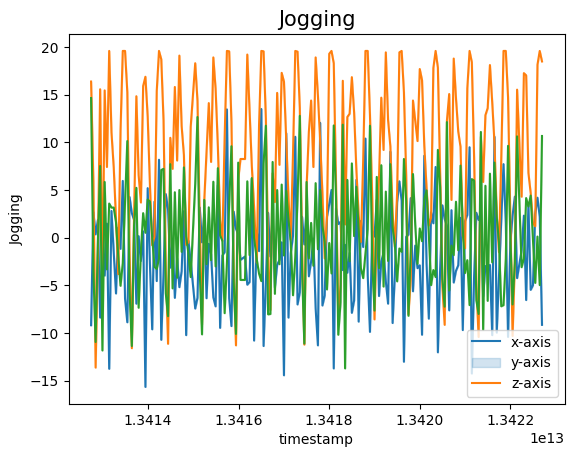

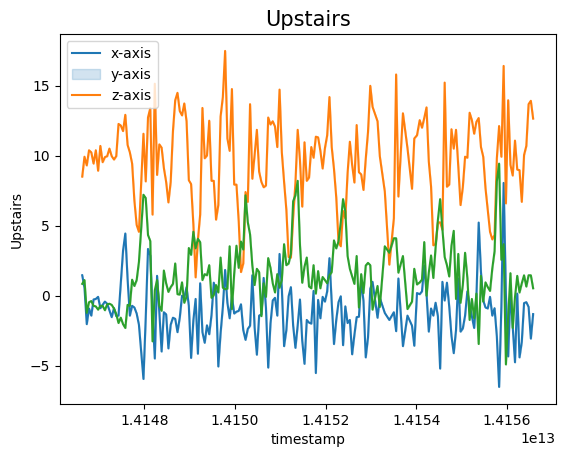

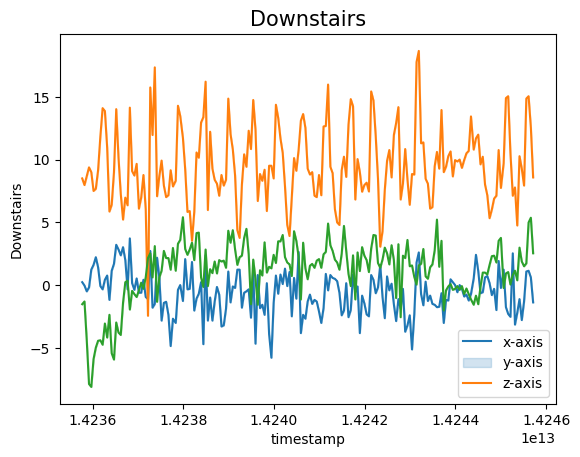

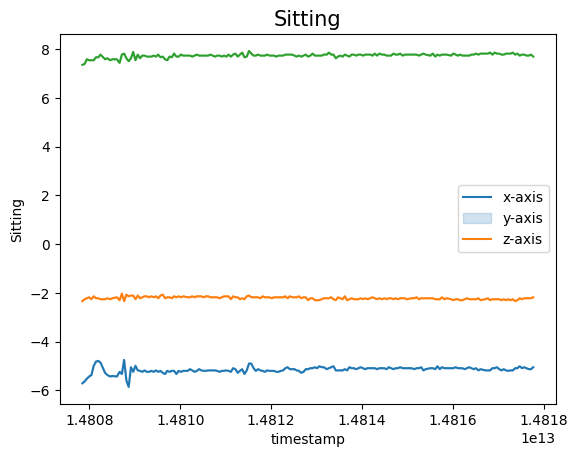

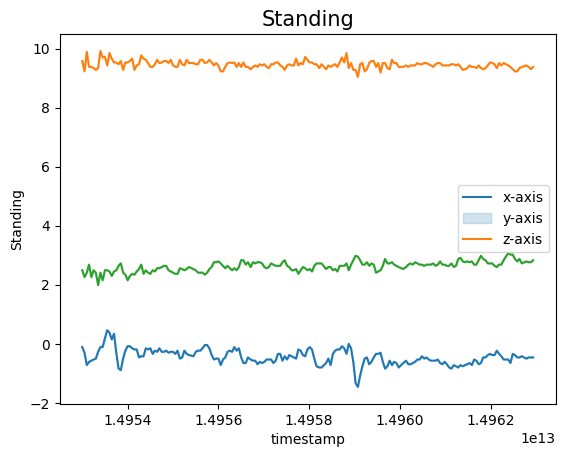

In [28]:
activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
for i in activities:
    data36 = df[(df['user'] == 36) & (df['activity'] == i)][:400]
    sns.lineplot(y = 'x-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'y-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'z-axis', x = 'timestamp', data = data36)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [29]:
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [30]:
segments = []
labels = []

In [33]:
for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['x-axis'].values[i: i + 50]

    ys = df['y-axis'].values[i: i + 50]

    zs = df['z-axis'].values[i: i + 50]

    label = stats.mode(df['activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\3611328424.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['activity'][i: i + 50])[0][0]
c:\Users\Tejashaarav S\miniconda3\envs\amex\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Tejashaarav S\AppData\Local\Temp\ipykernel_15904\3611328424.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.D

In [34]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)


In [35]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)


In [36]:
reshaped_segments.shape

(125778, 50, 3)

In [37]:
labels.shape

(125778, 6)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)


In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout